<a href="https://colab.research.google.com/github/charu11/ml_basics/blob/ml_basic/ml_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9822722760979224 [1098.25415466 1070.3434527  1014.86271813 1055.75599361 1071.94300024
 1072.89327088 1090.33058348 1108.78090355 1114.16466961 1121.36670722
 1131.02617908 1128.06384554 1147.00143742 1163.54000496 1134.10779641
 1120.86916302 1084.53201066 1100.4377886  1112.30311833 1120.5339745
 1133.31833666 1149.1647186  1179.39508811 1184.96654977 1154.4778555
 1168.04008881 1168.58060736 1151.48630544 1115.99444756 1113.23134477
 1111.96091258 1067.54022487 1039.76876653 1067.34792104 1014.95284242] 35


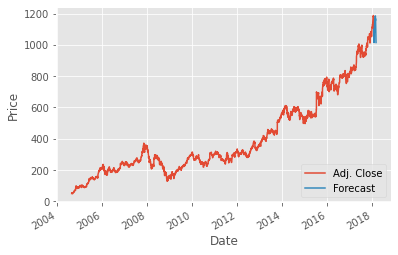

In [49]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import datetime
import matplotlib.pyplot as plt
from matplotlib import style


style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
  
forecast_set = clf.predict(X_lately)

#add a new column
df['Forecast'] = np.nan

# add the date to our prediction
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += 86400
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence, forecast_set, forecast_out)


df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

